## MASTER DATA SCIENCE: NUCLIO
### PROFESOR: JOSEPH GALLART
### PROJECT TRENMAX 2/2
### Silvia, Wesley, Daniela

In [5]:
#IMPORTAMOS LAS LIBRERÍAS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,MinMaxScaler

import folium
import plotly.express as px

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
#LEER EL ARCHIVO PICKLE
df_renfe_recuperado=pd.read_pickle("/content/drive/MyDrive/NUCLIO/11. Transformación de datos/Project TrenMax/df_renfe_clean (1).pkl")

In [ ]:
df_renfe_recuperado.head()

,CIUDAD_ORIGEN,CIUDAD_DESTINO,TIPO_TREN,TIPO_TARIFA,CLASE,PRECIO,TIEMPO_VIAJE,DIF_INI_BUS,FECHA_CONSULTA_HORA,FECHA_CONSULTA_NOMBREDIA,...,FECHA_CONSULTA_MES,FECHA_INICIO_HORA,FECHA_INICIO_NOMBREDIA,FECHA_INICIO_DIA,FECHA_INICIO_MES,FECHA_FIN_HORA,FECHA_FIN_NOMBREDIA,FECHA_FIN_DIA,FECHA_FIN_MES,RUTA
0,SEVILLA,MADRID,ALVIA,Flexible,Turista,67.20,158.0,50092.950000,1,Saturday,...,5,20,Friday,28,6,23,Friday,28,6,SEVILLA MADRID
1,BARCELONA,MADRID,AVE,Flexible,Turista,107.70,190.0,31494.816667,13,Saturday,...,6,10,Sunday,14,7,13,Sunday,14,7,BARCELONA MADRID
2,SEVILLA,MADRID,AVE,Promo,Turista,47.30,150.0,52275.950000,6,Wednesday,...,4,13,Thursday,23,5,16,Thursday,23,5,SEVILLA MADRID
3,VALENCIA,MADRID,REGIONAL,Adulto ida,Turista,28.35,460.0,26968.016667,21,Friday,...,5,14,Wednesday,29,5,22,Wednesday,29,5,VALENCIA MADRID
4,MADRID,BARCELONA,AVE-TGV,Promo,Turista,66.75,179.0,68741.383333,19,Thursday,...,5,13,Wednesday,26,6,16,Wednesday,26,6,MADRID BARCELONA


### PREGUNTA 1
##### Hola Juan, nuevamente Pedro por aquí, luego de hacer el análisis vamos a preparar nuestro dataset para hacer el modelo, para ello vamos a importar el dataset que está en un pickle, luego de ello por favor dime si hay variables correlacionadas, de ser así elimínalas por favor.

R: 'FECHA_INICIO_DIA' con 'FECHA_FIN_DIA' y 'FECHA_INICIO_MES' con 'FECHA_FIN_MES'. Por lo tanto hemos decidido crear una nueva columna común llamada FECHA_INI_FIN_MES y FECHA_INI_FIN_DIA y eliminar las otras.

In [10]:
corr = df_renfe_recuperado.corr(numeric_only=True)

In [11]:
corr.style.background_gradient(cmap='Oranges')

,PRECIO,TIEMPO_VIAJE,DIF_INI_BUS,FECHA_CONSULTA_HORA,FECHA_CONSULTA_DIA,FECHA_CONSULTA_MES,FECHA_INICIO_HORA,FECHA_INICIO_DIA,FECHA_INICIO_MES,FECHA_FIN_HORA,FECHA_FIN_DIA,FECHA_FIN_MES
PRECIO,1.000000,-0.234128,-0.242212,0.004322,-0.004429,-0.101142,0.062088,0.033258,-0.188555,-0.030274,0.033258,-0.188555
TIEMPO_VIAJE,-0.234128,1.000000,0.018297,-0.003846,-0.004647,-0.010935,-0.210673,-0.007194,-0.001396,0.135683,-0.007194,-0.001396
DIF_INI_BUS,-0.242212,0.018297,1.000000,0.003600,0.000414,0.078363,0.002825,-0.029557,0.450001,0.010536,-0.029557,0.450001
FECHA_CONSULTA_HORA,0.004322,-0.003846,0.003600,1.000000,-0.006662,0.008991,0.000085,-0.004670,0.015603,-0.001400,-0.004670,0.015603
FECHA_CONSULTA_DIA,-0.004429,-0.004647,0.000414,-0.006662,1.000000,-0.282488,0.000249,-0.002721,-0.065396,-0.001332,-0.002721,-0.065396
FECHA_CONSULTA_MES,-0.101142,-0.010935,0.078363,0.008991,-0.282488,1.000000,-0.001552,-0.083330,0.881646,-0.002555,-0.083330,0.881646
FECHA_INICIO_HORA,0.062088,-0.210673,0.002825,0.000085,0.000249,-0.001552,1.000000,0.003729,-0.005534,0.935601,0.003729,-0.005534
FECHA_INICIO_DIA,0.033258,-0.007194,-0.029557,-0.004670,-0.002721,-0.083330,0.003729,1.000000,-0.294364,0.000769,1.000000,-0.294364
FECHA_INICIO_MES,-0.188555,-0.001396,0.450001,0.015603,-0.065396,0.881646,-0.005534,-0.294364,1.000000,-0.002983,-0.294364,1.000000
FECHA_FIN_HORA,-0.030274,0.135683,0.010536,-0.001400,-0.001332,-0.002555,0.935601,0.000769,-0.002983,1.000000,0.000769,-0.002983


In [ ]:
# Vemos que FECHA_INICIO_DIA	está 100% relacionada con FECHA_FIN_DIA
# También tenemos FECHA_INICIO_MES con FECHA_FIN_MES
#esto significa que todos los viajes empiezan y terminan el mismo día y por lo tanto empiezan y terminan el mismo mes,
#en esté caso eliminaremos una de las 2 columnas y la otra la renombraremos como FECHA_INI_FIN_MES

In [12]:
del df_renfe_recuperado['FECHA_FIN_MES']

In [13]:
df_renfe_recuperado['FECHA_INI_FIN_MES'] = df_renfe_recuperado['FECHA_INICIO_MES']

In [14]:
del df_renfe_recuperado['FECHA_INICIO_MES']

In [15]:
del df_renfe_recuperado['FECHA_FIN_DIA']

In [16]:
df_renfe_recuperado['FECHA_INI_FIN_DIA'] = df_renfe_recuperado['FECHA_INICIO_DIA']

In [17]:
del df_renfe_recuperado['FECHA_INICIO_DIA']

### PREGUNTA 2
##### Perfecto Juan (o eso espero) he visto que la distribución del precio tiene una distribución un poco extraña, ¿Me puedes explicar? y ¿Qué podríamos hacer al respecto?

R: Eliminar los outlayers y corregir la distribuciòn aplicando logaritmo base 10.

In [18]:
df_renfe_recuperado2=df_renfe_recuperado.copy()

<Axes: >

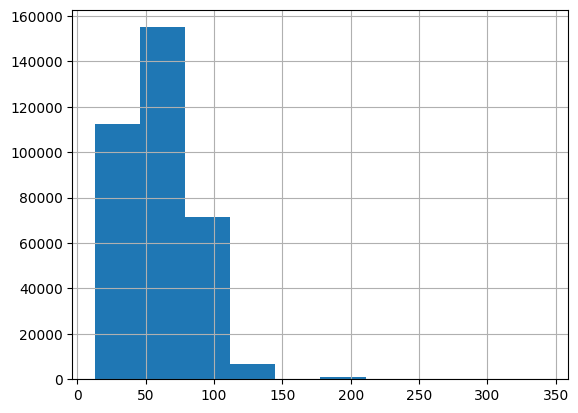

In [19]:
df_renfe_recuperado2['PRECIO'].hist()

In [20]:
df_renfe_recuperado2 = df_renfe_recuperado2[df_renfe_recuperado2['PRECIO']<150]

<Axes: >

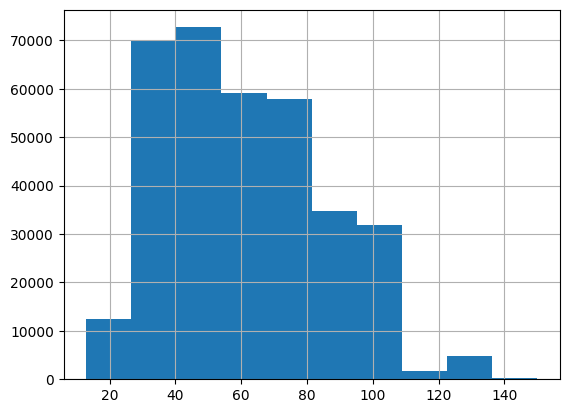

In [21]:
df_renfe_recuperado2['PRECIO'].hist()

In [22]:
df_renfe_recuperado2['LOG_PRECIO']=np.log10(df_renfe_recuperado2['PRECIO'])

<Axes: >

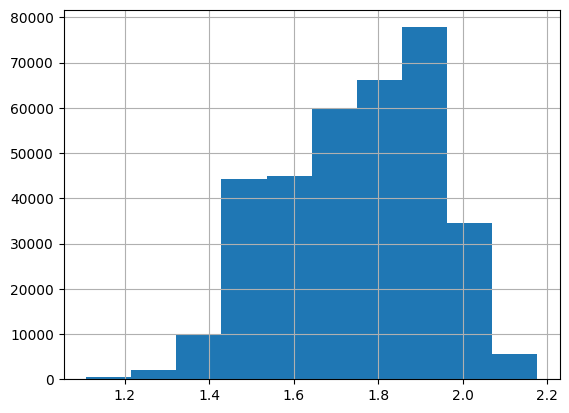

In [23]:
df_renfe_recuperado2['LOG_PRECIO'].hist()

<Axes: >

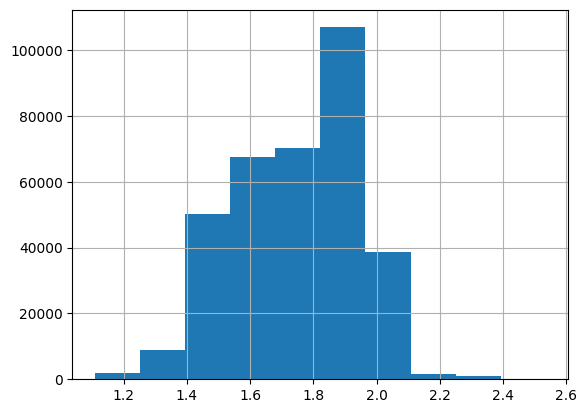

In [24]:
#Que si no hubiese tratado los outlayers y sólo se aplica el log:
df_renfe_recuperado['LOG_PRECIO']=np.log10(df_renfe_recuperado['PRECIO'])
df_renfe_recuperado['LOG_PRECIO'].hist()

In [25]:
df_renfe_recuperado2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345709 entries, 0 to 383567
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   CIUDAD_ORIGEN             345709 non-null  object 
 1   CIUDAD_DESTINO            345709 non-null  object 
 2   TIPO_TREN                 345709 non-null  object 
 3   TIPO_TARIFA               345709 non-null  object 
 4   CLASE                     345709 non-null  object 
 5   PRECIO                    345709 non-null  float64
 6   TIEMPO_VIAJE              345709 non-null  float64
 7   DIF_INI_BUS               345709 non-null  float64
 8   FECHA_CONSULTA_HORA       345709 non-null  int32  
 9   FECHA_CONSULTA_NOMBREDIA  345709 non-null  object 
 10  FECHA_CONSULTA_DIA        345709 non-null  int32  
 11  FECHA_CONSULTA_MES        345709 non-null  int32  
 12  FECHA_INICIO_HORA         345709 non-null  int32  
 13  FECHA_INICIO_NOMBREDIA    345709 non-null  o

### PREGUNTA 3
##### Gracias Juan, vamos a hacer un análisis de cómo se comportan las variables con respecto al precio, como son muchas pon especial atención en el día de inicio del viaje (lunes, martes, miércoles...) vs el precio, ¿Ves alguna relación? (usar violinplot)

R:
Observamos que donde se concentran más los precios el viernes y domingo ronda los 75€
Podemos ver que la mediana más alta de precios está en el domingo. El martes y el miércoles tienen una mediana más baja, ya que la mayor concentración de precios está en la parte inferior del violin.

In [26]:
df_renfe_recuperado3 = df_renfe_recuperado2.copy()

<Axes: xlabel='FECHA_INICIO_NOMBREDIA', ylabel='PRECIO'>

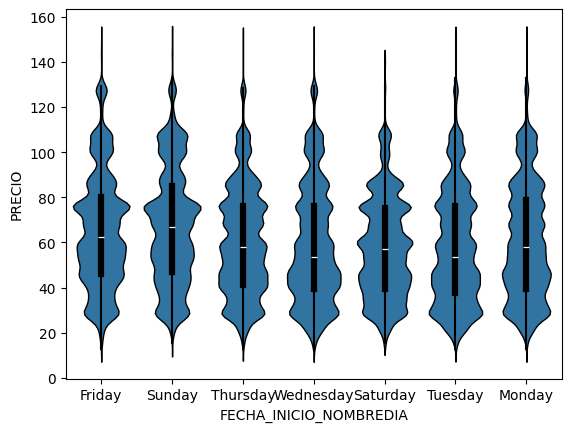

In [27]:
sns.violinplot(x='FECHA_INICIO_NOMBREDIA', y='PRECIO', linewidth=1,linecolor="k", data=df_renfe_recuperado3)

### PREGUNTA 4
##### También podemos hacer un análisis entre el tiempo de viaje y el precio, ¿Ves alguna relación? (usar scatterplot, si demora mucho hacer una muestra del dataset)

R:Parece ser que mientras que los viajes cortos tienen precios de todo tipo,
los viajes que superan los 210min (3h y media) son más económicos

In [ ]:
df_renfe_recuperado4 = df_renfe_recuperado3.copy()

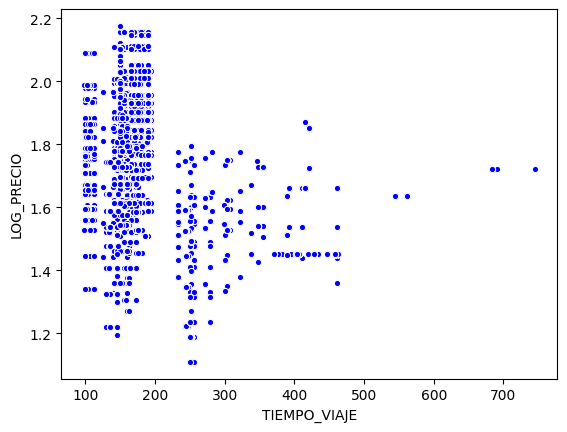

In [ ]:
sns.scatterplot(x='TIEMPO_VIAJE', y='LOG_PRECIO', s=80, color="blue", marker=".", data=df_renfe_recuperado4);

### PREGUNTA 5
##### Separemos nuestras variables, entre Listas_Categoricas, Listas_Numericas y Listas_Boolean, antes de eso podemos eliminar algunas columnas que a criterio de negocio podemos eliminar, ¿Cierto? Perfecto! voy a empezar a hacer el tratamiento con las Listas_Categoricas, he decidido aplicar un OneHotEncoding, eso ¿Qué significa? ¿Me lo recuerdas? ¡Vamos a hacerlo!

R: Un OnehotEndcoding coge los valores únicos dentro de una columna categorica
y con ellos crea nuevas columnas booleanas, con ello conseguimos ver a que
 categórica pertenece los valores de esa fila

(TIENE ALTERNATIVAS)

In [ ]:
target = ['LOG_PRECIO']
def obtener_lista_variables(dataset):
    lista_num = []
    lista_bool=[]
    lista_cat = []

    for i in dataset:
        if (dataset[i].dtype.kind=='i' or dataset[i].dtype.kind=='f') and\
        len(dataset[i].unique()) != 2 and i not in target:
            lista_num.append(i)

        elif (dataset[i].dtype.kind=='i' or dataset[i].dtype.kind=='f') and \
        len(dataset[i].unique()) == 2 and i not in target:
            lista_bool.append(i)

        elif (dataset[i].dtype.kind=='O') and i not in target:
            lista_cat.append(i)

    return lista_num, lista_bool, lista_cat

In [ ]:
lnum,lbool, lcat = obtener_lista_variables(df_renfe_recuperado4)

In [ ]:
lcat

['CIUDAD_ORIGEN',
 'CIUDAD_DESTINO',
 'TIPO_TREN',
 'TIPO_TARIFA',
 'CLASE',
 'FECHA_CONSULTA_NOMBREDIA',
 'FECHA_INICIO_NOMBREDIA',
 'FECHA_FIN_NOMBREDIA',
 'RUTA']

In [ ]:
df_renfe_recuperado5 = pd.get_dummies(data=df_renfe_recuperado4, columns = lcat)

In [ ]:
df_renfe_recuperado5.head()

,TIEMPO_VIAJE,DIF_INI_BUS,FECHA_CONSULTA_HORA,FECHA_CONSULTA_DIA,FECHA_CONSULTA_MES,FECHA_INICIO_HORA,FECHA_FIN_HORA,FECHA_INI_FIN_MES,FECHA_INI_FIN_DIA,LOG_PRECIO,...,FECHA_FIN_NOMBREDIA_Tuesday,FECHA_FIN_NOMBREDIA_Wednesday,RUTA_BARCELONA MADRID,RUTA_MADRID BARCELONA,RUTA_MADRID PONFERRADA,RUTA_MADRID SEVILLA,RUTA_MADRID VALENCIA,RUTA_PONFERRADA MADRID,RUTA_SEVILLA MADRID,RUTA_VALENCIA MADRID
0,158.0,50092.950000,1,25,5,20,23,6,28,1.827369,...,False,False,False,False,False,False,False,False,True,False
1,190.0,31494.816667,13,22,6,10,13,7,14,2.032216,...,False,False,True,False,False,False,False,False,False,False
2,150.0,52275.950000,6,17,4,13,16,5,23,1.674861,...,False,False,False,False,False,False,False,False,True,False
3,460.0,26968.016667,21,10,5,14,22,5,29,1.452553,...,False,True,False,False,False,False,False,False,False,True
4,179.0,68741.383333,19,9,5,13,16,6,26,1.824451,...,False,True,False,True,False,False,False,False,False,False


### PREGUNTA 6
##### Ahora las Listas_Numericas, un MinMaxScaler iría bien, ¿Qué significa eso?  ¡Vamos a hacerlo!

R: Con un MinMaxScaler transfomamos los valores dentro de una columna númerica
escalando los valores dentro de un rango establecido (por defecto 0-1)

(TIENE ALTERNATIVAS)

In [ ]:
df_renfe_recuperado6 = df_renfe_recuperado5.copy()

In [ ]:
lbool

[]

In [ ]:
lnum

['TIEMPO_VIAJE',
 'DIF_INI_BUS',
 'FECHA_CONSULTA_HORA',
 'FECHA_CONSULTA_DIA',
 'FECHA_CONSULTA_MES',
 'FECHA_INICIO_HORA',
 'FECHA_FIN_HORA',
 'FECHA_INI_FIN_MES',
 'FECHA_INI_FIN_DIA']

In [ ]:
minMaxResultado = MinMaxScaler()

In [ ]:
df_renfe_recuperado6[lnum] = minMaxResultado.fit_transform(df_renfe_recuperado6[lnum])

In [ ]:
df_renfe_recuperado6.head()

,TIEMPO_VIAJE,DIF_INI_BUS,FECHA_CONSULTA_HORA,FECHA_CONSULTA_DIA,FECHA_CONSULTA_MES,FECHA_INICIO_HORA,FECHA_FIN_HORA,FECHA_INI_FIN_MES,FECHA_INI_FIN_DIA,LOG_PRECIO,...,FECHA_FIN_NOMBREDIA_Tuesday,FECHA_FIN_NOMBREDIA_Wednesday,RUTA_BARCELONA MADRID,RUTA_MADRID BARCELONA,RUTA_MADRID PONFERRADA,RUTA_MADRID SEVILLA,RUTA_MADRID VALENCIA,RUTA_PONFERRADA MADRID,RUTA_SEVILLA MADRID,RUTA_VALENCIA MADRID
0,0.092736,0.582137,0.043478,0.800000,0.25,0.90,1.000000,0.333333,0.900000,1.827369,...,False,False,False,False,False,False,False,False,True,False
1,0.142195,0.365872,0.565217,0.700000,0.50,0.40,0.333333,0.500000,0.433333,2.032216,...,False,False,True,False,False,False,False,False,False,False
2,0.080371,0.607521,0.260870,0.533333,0.00,0.55,0.533333,0.166667,0.733333,1.674861,...,False,False,False,False,False,False,False,False,True,False
3,0.559505,0.313233,0.913043,0.300000,0.25,0.60,0.933333,0.166667,0.933333,1.452553,...,False,True,False,False,False,False,False,False,False,True
4,0.125193,0.798986,0.826087,0.266667,0.25,0.55,0.533333,0.333333,0.833333,1.824451,...,False,True,False,True,False,False,False,False,False,False


### PREGUNTA 7
##### Genial lo tenemos todo, ahora te voy a ayudar a hacer el modelo (en caso nos de el tiempo!), será tu primer modelo, ¿Verdad? :), cuando terminemos envíame el fichero que has desarrollado, mil gracias!

In [ ]:
df_renfe_recuperado7 = df_renfe_recuperado6.copy()